In [ ]:
# pip install pandas numpy seaborn matplotlib sklearn gbnn

In [ ]:
# Import the required modules
import re
import json
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from copy import deepcopy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, average_precision_score
# from sklearn import tree
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

In [ ]:
# from google.colab import files
# raw_data = files.upload()

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
raw_data = pd.read_excel('/content/gdrive/MyDrive/Trilytics23/AMC_health_and_safety_data.xlsx')

In [ ]:
excel_data = deepcopy(raw_data)

In [ ]:
raw_data

,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,...,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,CLASSIFICATION
0,220143000000,30,MILL OPERATION/PREPARATION PLANT,9/8/2014,2014,3,2014,4,1330,6,...,0.0,N,9/9/2014,?,NO VALUE FOUND,NaN,ee was moving a caustic line when the line fel...,NaN,C,HANDLING OF MATERIALS
1,220163000000,1,UNDERGROUND,10/26/2016,2016,4,2017,1,1400,3,...,11.0,N,11/9/2016,?,NO VALUE FOUND,NaN,employee was building and plastering a brattic...,3.201630e+11,C,HANDLING OF MATERIALS
2,220053000000,3,"STRIP, QUARY, OPEN PIT",10/4/2005,2005,4,2006,1,1325,3,...,1.0,N,10/6/2005,?,NO VALUE FOUND,NaN,he was lifting a piece of steel. he place a ch...,NaN,C,HANDLING OF MATERIALS
3,220063000000,30,MILL OPERATION/PREPARATION PLANT,10/17/2006,2006,4,2007,1,1140,3,...,0.0,NaN,NaN,?,NO VALUE FOUND,NaN,the technician was greasing on the sample syst...,NaN,C,HANDLING OF MATERIALS
4,220151000000,1,UNDERGROUND,2/11/2015,2015,1,2015,2,1430,3,...,9.0,Y,2/27/2015,?,NO VALUE FOUND,NaN,"as employee was lifting top frame of 84"" struc...",3.201510e+11,C,HANDLING OF MATERIALS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,220083000000,1,UNDERGROUND,11/7/2008,2008,4,2009,1,2054,8,...,0.0,NaN,NaN,?,NO VALUE FOUND,11/7/2008,employee was found slumped over a three wheel ...,NaN,C,OTHER
36012,220060000000,3,"STRIP, QUARY, OPEN PIT",1/3/2006,2006,1,2006,2,2200,6,...,0.0,N,1/3/2006,?,NO VALUE FOUND,NaN,employee was repairing equipment when wind ble...,NaN,C,OTHER
36013,220043000000,2,SURFACE AT UNDERGROUND,10/18/2004,2004,4,2005,1,730,8,...,0.0,NaN,NaN,?,NO VALUE FOUND,10/18/2004,"was getting dressed prior to his shift, the em...",NaN,C,OTHER
36014,220181000000,1,UNDERGROUND,5/2/2018,2018,2,2018,3,1830,3,...,32.0,N,6/11/2018,?,NO VALUE FOUND,NaN,a fully trained miner was bitten by a spider w...,3.201820e+11,C,OTHER


In [ ]:
raw_data.columns = raw_data.columns.str.replace(' ', '')

In [ ]:
raw_data = raw_data.replace({'?': None,'? ':None, 'NO VALUE FOUND': None, np.nan : None})

In [ ]:
def has_question_mark(cell):
    if isinstance(cell, str):
        return '?' in cell
    return False

# Apply the function to each cell of the DataFrame
result = raw_data.applymap(has_question_mark)
print(result)

       DOCUMENT_NO  SUBUNIT_CD  SUBUNIT  ACCIDENT_DT  CAL_YR  CAL_QTR  \
0            False       False    False        False   False    False   
1            False       False    False        False   False    False   
2            False       False    False        False   False    False   
3            False       False    False        False   False    False   
4            False       False    False        False   False    False   
...            ...         ...      ...          ...     ...      ...   
36011        False       False    False        False   False    False   
36012        False       False    False        False   False    False   
36013        False       False    False        False   False    False   
36014        False       False    False        False   False    False   
36015        False       False    False        False   False    False   

       FISCAL_YR  FISCAL_QTR  ACCIDENT_TIME  DEGREE_INJURY_CD  ...  DAYS_LOST  \
0          False       False          Fals

In [ ]:
raw_null_stats = raw_data.isna().sum()

In [ ]:
# raw_data = raw_data.replace({r'[?]': None, 'NO VALUE FOUND': None, np.nan : None})
# df.replace(regex=[r'^ba.$', 'foo'], value='new')

In [ ]:
# raw_data['IMMED_NOTIFY_CD'][0]

In [ ]:
# sorted_raw_null_stats = raw_data.isna().sum().sort_values(ascending = False)
# x = np.array(sorted_raw_null_stats.index)
# y = np.array(sorted_raw_null_stats)

# fig = plt.figure(figsize = (15, 5))
# plt.bar(x, y, label = 'Missing Values')
# plt.legend()
# plt.xticks(rotation = 90)
# plt.yticks(np.arange(0, max(raw_data.isna().sum()), step=2000))
# plt.show()

In [ ]:
# raw_data.isna().sum()* 100/len(excel_data)

In [ ]:
raw_data.dtypes

DOCUMENT_NO             int64
SUBUNIT_CD              int64
SUBUNIT                object
ACCIDENT_DT            object
CAL_YR                  int64
CAL_QTR                 int64
FISCAL_YR               int64
FISCAL_QTR              int64
ACCIDENT_TIME           int64
DEGREE_INJURY_CD       object
DEGREE_INJURY          object
FIPS_STATE_CD           int64
UG_LOCATION_CD         object
UG_LOCATION            object
UG_MINING_METHOD_CD    object
UG_MINING_METHOD       object
MINING_EQUIP_CD        object
MINING_EQUIP           object
EQUIP_MFR_CD           object
EQUIP_MFR_NAME         object
EQUIP_MODEL_NO         object
SHIFT_BEGIN_TIME       object
ACCIDENT_TYPE          object
NO_INJURIES             int64
TOT_EXPER              object
MINE_EXPER             object
JOB_EXPER              object
OCCUPATION_CD          object
OCCUPATION             object
ACTIVITY_CD            object
ACTIVITY               object
INJURY_SOURCE_CD       object
INJURY_SOURCE          object
NATURE_INJ

In [ ]:
# Dropping columns which make have more than 50 percent null values
columns_more_than_50percent_null = []
raw_null_stats_percentage = (raw_null_stats * 100) / len(raw_data)
for column in raw_data.columns:
  if raw_null_stats_percentage[column] >= 50.0:
    columns_more_than_50percent_null.append(column)
print(columns_more_than_50percent_null)
raw_data = raw_data.drop(columns_more_than_50percent_null,axis = 1)

['EQUIP_MODEL_NO', 'IMMED_NOTIFY_CD', 'IMMED_NOTIFY', 'INVEST_BEGIN_DT', 'CLOSED_DOC_NO']


In [ ]:
# Dropped the narrative column
raw_data = raw_data.drop('NARRATIVE', axis = 1)

In [ ]:
len(raw_data.columns)

43

In [ ]:
# Mapping columnsCD with description
columnsCD = []
columnsCDNoCDmapping = {}
for column in raw_data.columns:
  if '_CD' in column:
    columnsCD.append(column)
for column in columnsCD:
  if column[0:-3] in raw_data.columns:
    columnsCDNoCDmapping[column] = column[0:-3]
columnsCDNoCDmapping['EQUIP_MFR_CD'] = 'EQUIP_MFR_NAME'
print(f'Columns having CD:{columnsCD}')
print(columnsCDNoCDmapping)

Columns having CD:['SUBUNIT_CD', 'DEGREE_INJURY_CD', 'FIPS_STATE_CD', 'UG_LOCATION_CD', 'UG_MINING_METHOD_CD', 'MINING_EQUIP_CD', 'EQUIP_MFR_CD', 'OCCUPATION_CD', 'ACTIVITY_CD', 'INJURY_SOURCE_CD', 'NATURE_INJURY_CD', 'INJ_BODY_PART_CD']
{'SUBUNIT_CD': 'SUBUNIT', 'DEGREE_INJURY_CD': 'DEGREE_INJURY', 'UG_LOCATION_CD': 'UG_LOCATION', 'UG_MINING_METHOD_CD': 'UG_MINING_METHOD', 'MINING_EQUIP_CD': 'MINING_EQUIP', 'OCCUPATION_CD': 'OCCUPATION', 'ACTIVITY_CD': 'ACTIVITY', 'INJURY_SOURCE_CD': 'INJURY_SOURCE', 'NATURE_INJURY_CD': 'NATURE_INJURY', 'INJ_BODY_PART_CD': 'INJ_BODY_PART', 'EQUIP_MFR_CD': 'EQUIP_MFR_NAME'}


In [ ]:
# Checked if there is a one to one mapping between CD and description columns and collected the list of columns to drop
colCD_to_colNoCD_multiple_values = {}
colNoCD_to_colCD_multiple_values = {}
columns_to_drop = []

for colCD, colNoCD in columnsCDNoCDmapping.items():
    col_dict_CD_to_NoCD = {}
    col_dict_NoCD_to_CD = {}

    for _, row in raw_data.iterrows():
        col_cd = row[colCD]
        col_name = row[colNoCD]

        # colCD to colNoCD mapping
        if col_cd not in col_dict_CD_to_NoCD:
            col_dict_CD_to_NoCD[col_cd] = {col_name}
        else:
            col_dict_CD_to_NoCD[col_cd].add(col_name)

        # colNoCD to colCD mapping
        if col_name not in col_dict_NoCD_to_CD:
            col_dict_NoCD_to_CD[col_name] = {col_cd}
        else:
            col_dict_NoCD_to_CD[col_name].add(col_cd)

    col_dict_CD_to_NoCD = {key: list(values) for key, values in col_dict_CD_to_NoCD.items()}
    col_dict_NoCD_to_CD = {key: list(values) for key, values in col_dict_NoCD_to_CD.items()}

    # colCD to colNoCD mapping
    multiple_values_count_CD_to_NoCD = sum(1 for values in col_dict_CD_to_NoCD.values() if len(values) > 1)
    print(f"{colCD} to {colNoCD}:")
    for key, values in col_dict_CD_to_NoCD.items():
        if len(values) > 1:
            colCD_to_colNoCD_multiple_values[key] = values
            # print(f"Column {key} has multiple values: {values}")
    print(f"Total keys with multiple values: {multiple_values_count_CD_to_NoCD}")

    # colNoCD to colCD mapping
    multiple_values_count_NoCD_to_CD = sum(1 for values in col_dict_NoCD_to_CD.values() if len(values) > 1)
    print(f"{colNoCD} to {colCD}:")
    for key, values in col_dict_NoCD_to_CD.items():
        if len(values) > 1:
            colNoCD_to_colCD_multiple_values[key] = values
            # print(f"Column {key} has multiple values: {values}")
    print(f"Total keys with multiple values: {multiple_values_count_NoCD_to_CD}")
    print("\n")
    # Check if both mappings have no multiple values
    if multiple_values_count_CD_to_NoCD == 0 and multiple_values_count_NoCD_to_CD == 0:
        columns_to_drop.append(colNoCD)
print(f'Columns to drop: {columns_to_drop}')

SUBUNIT_CD to SUBUNIT:
Total keys with multiple values: 0
SUBUNIT to SUBUNIT_CD:
Total keys with multiple values: 0


DEGREE_INJURY_CD to DEGREE_INJURY:
Total keys with multiple values: 0
DEGREE_INJURY to DEGREE_INJURY_CD:
Total keys with multiple values: 0


UG_LOCATION_CD to UG_LOCATION:
Total keys with multiple values: 0
UG_LOCATION to UG_LOCATION_CD:
Total keys with multiple values: 0


UG_MINING_METHOD_CD to UG_MINING_METHOD:
Total keys with multiple values: 0
UG_MINING_METHOD to UG_MINING_METHOD_CD:
Total keys with multiple values: 0


MINING_EQUIP_CD to MINING_EQUIP:
Total keys with multiple values: 0
MINING_EQUIP to MINING_EQUIP_CD:
Total keys with multiple values: 0


OCCUPATION_CD to OCCUPATION:
Total keys with multiple values: 0
OCCUPATION to OCCUPATION_CD:
Total keys with multiple values: 33


ACTIVITY_CD to ACTIVITY:
Total keys with multiple values: 0
ACTIVITY to ACTIVITY_CD:
Total keys with multiple values: 0


INJURY_SOURCE_CD to INJURY_SOURCE:
Total keys with multiple v

In [ ]:
# Drop the unwanted columns for analysis
raw_data = raw_data.drop(columns_to_drop, axis = 1)

In [ ]:
print(raw_data.columns, len(raw_data.columns))

Index(['DOCUMENT_NO', 'SUBUNIT_CD', 'ACCIDENT_DT', 'CAL_YR', 'CAL_QTR',
       'FISCAL_YR', 'FISCAL_QTR', 'ACCIDENT_TIME', 'DEGREE_INJURY_CD',
       'FIPS_STATE_CD', 'UG_LOCATION_CD', 'UG_MINING_METHOD_CD',
       'MINING_EQUIP_CD', 'EQUIP_MFR_CD', 'EQUIP_MFR_NAME', 'SHIFT_BEGIN_TIME',
       'ACCIDENT_TYPE', 'NO_INJURIES', 'TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER',
       'OCCUPATION_CD', 'OCCUPATION', 'ACTIVITY_CD', 'INJURY_SOURCE_CD',
       'NATURE_INJURY_CD', 'INJ_BODY_PART_CD', 'SCHEDULE_CHARGE',
       'DAYS_RESTRICT', 'DAYS_LOST', 'TRANS_TERM', 'RETURN_TO_WORK_DT',
       'COAL_METAL_IND', 'CLASSIFICATION'],
      dtype='object') 34


In [ ]:
# Printing column names having missing values
col_list = list(raw_data.columns[raw_data.isna().any()])
print(f'Number of columns having missing values:{len(col_list)}')
for col in col_list:
    print(col)

Number of columns having missing values:21
DEGREE_INJURY_CD
UG_LOCATION_CD
UG_MINING_METHOD_CD
MINING_EQUIP_CD
EQUIP_MFR_CD
EQUIP_MFR_NAME
SHIFT_BEGIN_TIME
TOT_EXPER
MINE_EXPER
JOB_EXPER
OCCUPATION_CD
OCCUPATION
ACTIVITY_CD
INJURY_SOURCE_CD
NATURE_INJURY_CD
INJ_BODY_PART_CD
SCHEDULE_CHARGE
DAYS_RESTRICT
DAYS_LOST
TRANS_TERM
RETURN_TO_WORK_DT


In [ ]:
# Replacing Nan values with mode
for col in col_list:
    mode_value = raw_data[col].mode().iloc[0]
    print(f'Mode of {col} is {mode_value}')
    raw_data[col] = raw_data[col].replace({None: mode_value})

Mode of DEGREE_INJURY_CD is 3
Mode of UG_LOCATION_CD is 3
Mode of UG_MINING_METHOD_CD is 5
Mode of MINING_EQUIP_CD is 28
Mode of EQUIP_MFR_CD is 121
Mode of EQUIP_MFR_NAME is Not Reported
Mode of SHIFT_BEGIN_TIME is 700.0
Mode of TOT_EXPER is 10.0
Mode of MINE_EXPER is 2.0
Mode of JOB_EXPER is 2.0
Mode of OCCUPATION_CD is 46
Mode of OCCUPATION is Maintenance man, Mechanic,  Repair/Serviceman, Boilermaker, Fueler, Tire tech, Field service tech
Mode of ACTIVITY_CD is 28
Mode of INJURY_SOURCE_CD is 88
Mode of NATURE_INJURY_CD is 330
Mode of INJ_BODY_PART_CD is 340
Mode of SCHEDULE_CHARGE is 0.0
Mode of DAYS_RESTRICT is 0.0
Mode of DAYS_LOST is 0.0
Mode of TRANS_TERM is N
Mode of RETURN_TO_WORK_DT is 5/1/2005


In [ ]:
# Understanding of the dataset and converting the type of columns
def changetype(col_names,datatype):
    for col in col_names:
        raw_data[col] = raw_data[col].astype(datatype)

date_columns = []
time_columns = []
year_qtr_columns = []
cd_columns = []
rest = []
exp_columns = []
days_columns = []
charge_columns = []
number_columns = []
for col in raw_data.columns:
    if col.endswith('_DT'):
        date_columns.append(col)
    elif col == 'DOCUMENT_NO':
        raw_data['DOCUMENT_NO'] = raw_data['DOCUMENT_NO'].astype(float)
    elif col.endswith('_TIME'):
        time_columns.append(col)
    elif col.endswith('_YR') or col.endswith('_QTR'):
        year_qtr_columns.append(col)
    elif col.endswith('_CD'):
        cd_columns.append(col)
    elif col.endswith('_EXPER'):
        exp_columns.append(col)
    elif col.startswith('DAYS'):
        days_columns.append(col)
    elif col.endswith('_CHARGE'):
        charge_columns.append(col)
    elif col.startswith('NO'):
        number_columns.append(col)
    else:
        rest.append(col)

print("Date Columns:", date_columns,len(date_columns))
changetype(date_columns,object)
print("Time Columns:", time_columns,len(time_columns))
changetype(time_columns,float)
print("Year/Quarter Columns:", year_qtr_columns,len(year_qtr_columns))
changetype(year_qtr_columns,float)
print("CD Columns:", cd_columns,len(cd_columns))
changetype(cd_columns,float)
print("Experience Columns",exp_columns,len(exp_columns))
changetype(exp_columns,float)
print("Days Columns",days_columns,len(days_columns))
changetype(days_columns,float)
print("Charge Columns",charge_columns,len(charge_columns))
changetype(charge_columns,float)
print("Number Columns",number_columns,len(number_columns))
changetype(number_columns,float)
print("Rest of the Columns:", rest)
columns_to_encode = []
for col in rest:
    if raw_data[col].dtype == 'object':
      if col != 'CLASSIFICATION':
        columns_to_encode.append(col)
classification_col = 'CLASSIFICATION'

Date Columns: ['ACCIDENT_DT', 'RETURN_TO_WORK_DT'] 2
Time Columns: ['ACCIDENT_TIME', 'SHIFT_BEGIN_TIME'] 2
Year/Quarter Columns: ['CAL_YR', 'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR'] 4
CD Columns: ['SUBUNIT_CD', 'DEGREE_INJURY_CD', 'FIPS_STATE_CD', 'UG_LOCATION_CD', 'UG_MINING_METHOD_CD', 'MINING_EQUIP_CD', 'EQUIP_MFR_CD', 'OCCUPATION_CD', 'ACTIVITY_CD', 'INJURY_SOURCE_CD', 'NATURE_INJURY_CD', 'INJ_BODY_PART_CD'] 12
Experience Columns ['TOT_EXPER', 'MINE_EXPER', 'JOB_EXPER'] 3
Days Columns ['DAYS_RESTRICT', 'DAYS_LOST'] 2
Charge Columns ['SCHEDULE_CHARGE'] 1
Number Columns ['NO_INJURIES'] 1
Rest of the Columns: ['EQUIP_MFR_NAME', 'ACCIDENT_TYPE', 'OCCUPATION', 'TRANS_TERM', 'COAL_METAL_IND', 'CLASSIFICATION']


In [ ]:
print(raw_data.dtypes)

DOCUMENT_NO            float64
SUBUNIT_CD             float64
ACCIDENT_DT             object
CAL_YR                 float64
CAL_QTR                float64
FISCAL_YR              float64
FISCAL_QTR             float64
ACCIDENT_TIME          float64
DEGREE_INJURY_CD       float64
FIPS_STATE_CD          float64
UG_LOCATION_CD         float64
UG_MINING_METHOD_CD    float64
MINING_EQUIP_CD        float64
EQUIP_MFR_CD           float64
EQUIP_MFR_NAME          object
SHIFT_BEGIN_TIME       float64
ACCIDENT_TYPE           object
NO_INJURIES            float64
TOT_EXPER              float64
MINE_EXPER             float64
JOB_EXPER              float64
OCCUPATION_CD          float64
OCCUPATION              object
ACTIVITY_CD            float64
INJURY_SOURCE_CD       float64
NATURE_INJURY_CD       float64
INJ_BODY_PART_CD       float64
SCHEDULE_CHARGE        float64
DAYS_RESTRICT          float64
DAYS_LOST              float64
TRANS_TERM              object
RETURN_TO_WORK_DT       object
COAL_MET

In [ ]:
raw_data.isna().sum()

DOCUMENT_NO            0
SUBUNIT_CD             0
ACCIDENT_DT            0
CAL_YR                 0
CAL_QTR                0
FISCAL_YR              0
FISCAL_QTR             0
ACCIDENT_TIME          0
DEGREE_INJURY_CD       0
FIPS_STATE_CD          0
UG_LOCATION_CD         0
UG_MINING_METHOD_CD    0
MINING_EQUIP_CD        0
EQUIP_MFR_CD           0
EQUIP_MFR_NAME         0
SHIFT_BEGIN_TIME       0
ACCIDENT_TYPE          0
NO_INJURIES            0
TOT_EXPER              0
MINE_EXPER             0
JOB_EXPER              0
OCCUPATION_CD          0
OCCUPATION             0
ACTIVITY_CD            0
INJURY_SOURCE_CD       0
NATURE_INJURY_CD       0
INJ_BODY_PART_CD       0
SCHEDULE_CHARGE        0
DAYS_RESTRICT          0
DAYS_LOST              0
TRANS_TERM             0
RETURN_TO_WORK_DT      0
COAL_METAL_IND         0
CLASSIFICATION         0
dtype: int64

In [ ]:
print("Columns to encode:", columns_to_encode)

Columns to encode: ['EQUIP_MFR_NAME', 'ACCIDENT_TYPE', 'OCCUPATION', 'TRANS_TERM', 'COAL_METAL_IND']


In [ ]:
# with open('columns.txt', 'w') as file:
#   for column in X.columns:
#     file.write(f'{column.lower()}\n')

In [ ]:
# print(excel_data['CLASSIFICATION'].unique())
# print('Count of Classes:', len(excel_data['CLASSIFICATION'].unique()))

In [ ]:
# with open('classification_outputs.txt', 'w') as file:
#   for class_output in excel_data['CLASSIFICATION'].unique():
#     file.write(f'{class_output.lower()}\n')

In [ ]:
# Defined the CustomEncoder class to fit transform and inverse transform string attributes
class CustomEncoder:
    def __init__(self, columns_to_encode):
        self.columns_to_encode = columns_to_encode
        self.label_encoders = {}
        self.onehot_encoders = {}

    def fit_transform(self, raw_data):
        encoded_data = raw_data.copy()
        for col in self.columns_to_encode:
            values = raw_data[col]
            label_encoder = LabelEncoder()
            integer_encoded = label_encoder.fit_transform(values)
            integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
            onehot_encoder = OneHotEncoder(sparse=False)
            onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
            self.label_encoders[col] = label_encoder
            self.onehot_encoders[col] = onehot_encoder
            # Create new column names for one-hot encoded features
            new_columns = [f"{col}_{label_encoder.classes_[i]}" for i in range(len(label_encoder.classes_))]
            encoded_data = pd.concat([encoded_data, pd.DataFrame(onehot_encoded, columns=new_columns)], axis=1)
            encoded_data.drop(columns=col, inplace=True)
        return encoded_data

    def inverse_transform(self, encoded_data):
        raw_data = encoded_data.copy()
        for col in self.columns_to_encode:
            if col in self.label_encoders and col in self.onehot_encoders:
                label_encoder = self.label_encoders[col]
                onehot_encoder = self.onehot_encoders[col]
                # Get the one-hot encoded columns for the specific feature
                pattern = fr"^{col}_(?!CD)"
                filtered_columns = [col for col in encoded_data.columns if re.match(pattern, col)]
                onehot_data = encoded_data[filtered_columns]
                # Convert DataFrame to 2D numpy array
                onehot_array = onehot_data.to_numpy()
                integer_encoded = onehot_encoder.inverse_transform(onehot_array)
                raw_data[col] = label_encoder.inverse_transform(integer_encoded)
                # Drop the one-hot encoded columns
                raw_data.drop(columns=onehot_data.columns, inplace=True)
        return raw_data

In [ ]:
# Applied the encoder and pickled into a pickle file for reversing the encoding process back
encoder = CustomEncoder(columns_to_encode)

encoded_data = encoder.fit_transform(raw_data)

with open('custom_encoder.pickle', 'wb') as file:
    pickle.dump(encoder, file)

with open('custom_encoder.pickle', 'rb') as file:
    loaded_encoder = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
encoded_data

,DOCUMENT_NO,SUBUNIT_CD,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,FIPS_STATE_CD,...,OCCUPATION_Water truck operator,"OCCUPATION_Weighman, Scale person",OCCUPATION_Welder,OCCUPATION_Welder (non-shop),OCCUPATION_Welder (shop),"OCCUPATION_Wireman, Communications man",TRANS_TERM_N,TRANS_TERM_Y,COAL_METAL_IND_C,COAL_METAL_IND_M
0,2.201430e+11,30.0,9/8/2014,2014.0,3.0,2014.0,4.0,1330.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.201630e+11,1.0,10/26/2016,2016.0,4.0,2017.0,1.0,1400.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.200530e+11,3.0,10/4/2005,2005.0,4.0,2006.0,1.0,1325.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2.200630e+11,30.0,10/17/2006,2006.0,4.0,2007.0,1.0,1140.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.201510e+11,1.0,2/11/2015,2015.0,1.0,2015.0,2.0,1430.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,2.200830e+11,1.0,11/7/2008,2008.0,4.0,2009.0,1.0,2054.0,8.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36012,2.200600e+11,3.0,1/3/2006,2006.0,1.0,2006.0,2.0,2200.0,6.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36013,2.200430e+11,2.0,10/18/2004,2004.0,4.0,2005.0,1.0,730.0,8.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36014,2.201810e+11,1.0,5/2/2018,2018.0,2.0,2018.0,3.0,1830.0,3.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
len(encoded_data.columns)

357

In [ ]:
decoded_data = loaded_encoder.inverse_transform(encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
classification_columns = decoded_data.filter(regex=r'^CLASSIFICATION')
print(classification_columns)

              CLASSIFICATION
0      HANDLING OF MATERIALS
1      HANDLING OF MATERIALS
2      HANDLING OF MATERIALS
3      HANDLING OF MATERIALS
4      HANDLING OF MATERIALS
...                      ...
36011                  OTHER
36012                  OTHER
36013                  OTHER
36014                  OTHER
36015                  OTHER

[36016 rows x 1 columns]


In [ ]:
encoded_data

,DOCUMENT_NO,SUBUNIT_CD,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,FIPS_STATE_CD,...,OCCUPATION_Water truck operator,"OCCUPATION_Weighman, Scale person",OCCUPATION_Welder,OCCUPATION_Welder (non-shop),OCCUPATION_Welder (shop),"OCCUPATION_Wireman, Communications man",TRANS_TERM_N,TRANS_TERM_Y,COAL_METAL_IND_C,COAL_METAL_IND_M
0,2.201430e+11,30.0,9/8/2014,2014.0,3.0,2014.0,4.0,1330.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.201630e+11,1.0,10/26/2016,2016.0,4.0,2017.0,1.0,1400.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.200530e+11,3.0,10/4/2005,2005.0,4.0,2006.0,1.0,1325.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2.200630e+11,30.0,10/17/2006,2006.0,4.0,2007.0,1.0,1140.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.201510e+11,1.0,2/11/2015,2015.0,1.0,2015.0,2.0,1430.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36011,2.200830e+11,1.0,11/7/2008,2008.0,4.0,2009.0,1.0,2054.0,8.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36012,2.200600e+11,3.0,1/3/2006,2006.0,1.0,2006.0,2.0,2200.0,6.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36013,2.200430e+11,2.0,10/18/2004,2004.0,4.0,2005.0,1.0,730.0,8.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36014,2.201810e+11,1.0,5/2/2018,2018.0,2.0,2018.0,3.0,1830.0,3.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
encoded_data.dtypes

DOCUMENT_NO                               float64
SUBUNIT_CD                                float64
ACCIDENT_DT                                object
CAL_YR                                    float64
CAL_QTR                                   float64
                                           ...   
OCCUPATION_Wireman, Communications man    float64
TRANS_TERM_N                              float64
TRANS_TERM_Y                              float64
COAL_METAL_IND_C                          float64
COAL_METAL_IND_M                          float64
Length: 357, dtype: object

In [ ]:
# Converted the datetime object into float type
for col in date_columns:
  encoded_data[col] = pd.to_datetime(encoded_data[col],format = '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')
  encoded_data[col] = pd.to_numeric(encoded_data[col].astype('int64')) / 10**9
  print(encoded_data[col])

0       -9.223372e+09
1       -9.223372e+09
2       -9.223372e+09
3       -9.223372e+09
4       -9.223372e+09
             ...     
36011   -9.223372e+09
36012   -9.223372e+09
36013   -9.223372e+09
36014   -9.223372e+09
36015   -9.223372e+09
Name: ACCIDENT_DT, Length: 36016, dtype: float64
0       -9.223372e+09
1       -9.223372e+09
2       -9.223372e+09
3       -9.223372e+09
4       -9.223372e+09
             ...     
36011   -9.223372e+09
36012   -9.223372e+09
36013   -9.223372e+09
36014   -9.223372e+09
36015   -9.223372e+09
Name: RETURN_TO_WORK_DT, Length: 36016, dtype: float64


In [ ]:
encoded_data.dtypes

DOCUMENT_NO                               float64
SUBUNIT_CD                                float64
ACCIDENT_DT                               float64
CAL_YR                                    float64
CAL_QTR                                   float64
                                           ...   
OCCUPATION_Wireman, Communications man    float64
TRANS_TERM_N                              float64
TRANS_TERM_Y                              float64
COAL_METAL_IND_C                          float64
COAL_METAL_IND_M                          float64
Length: 357, dtype: object

In [ ]:
X = encoded_data.drop(columns=['CLASSIFICATION'])
y = encoded_data['CLASSIFICATION']

In [ ]:
classes = list(raw_data['CLASSIFICATION'].unique())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
gbc_model = GradientBoostingClassifier()

# Fit the model on the training data
gbc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc_model.predict(X_test)
y_prob = gbc_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate evaluation measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9318434203220433
Precision: 0.9313984052201136
Recall: 0.9318434203220433
F1 Score: 0.9311512842353245


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

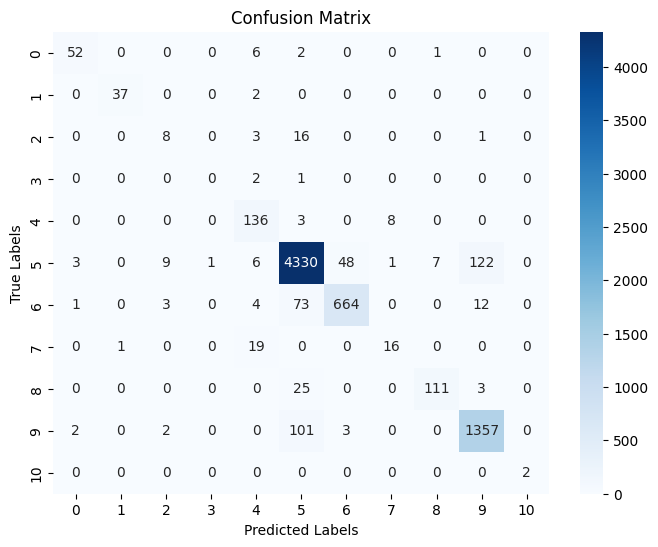

In [ ]:
# 1. Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

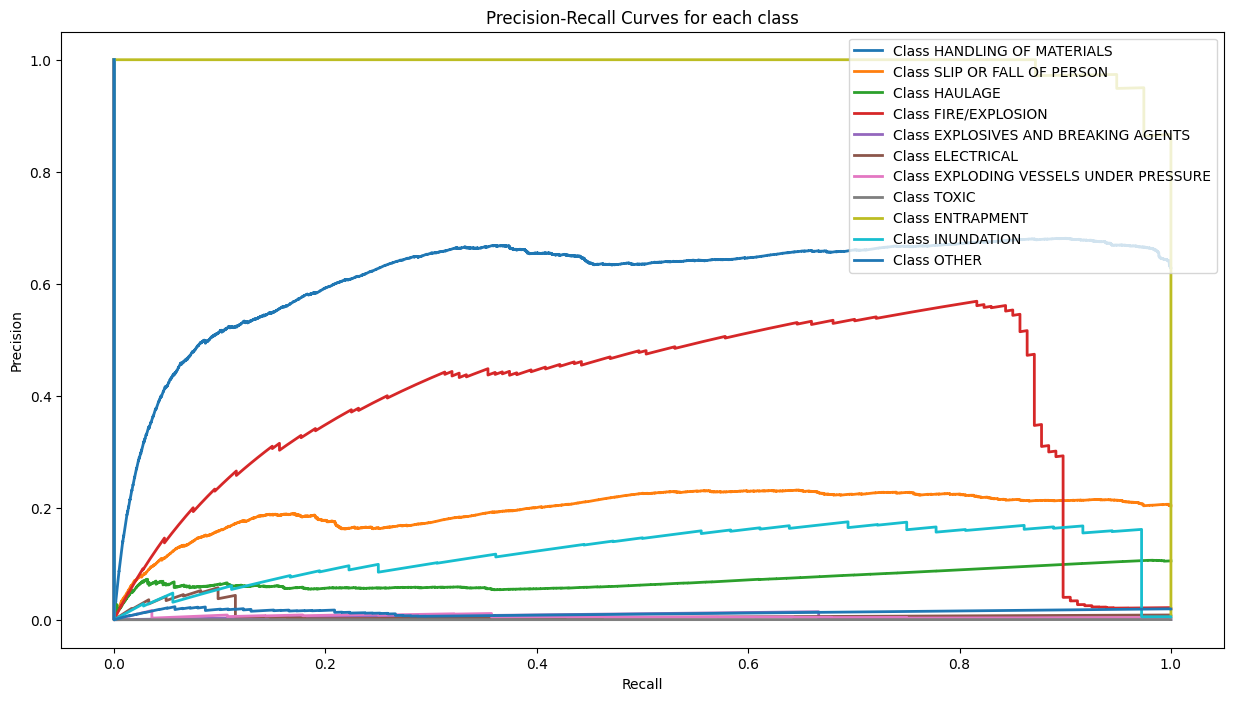

In [ ]:
# Binarize the labels for multiclass classification
y_test_binarized = label_binarize(y_test, classes = classes)
num_classes = len(classes)
# Calculate precision and recall for each class using OvR strategy
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob)  # No indexing for y_prob
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_prob)

# 2. Precision-Recall Curves for each class
plt.figure(figsize=(15, 8))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(classes[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for each class')
plt.legend(loc="upper right")
plt.show()

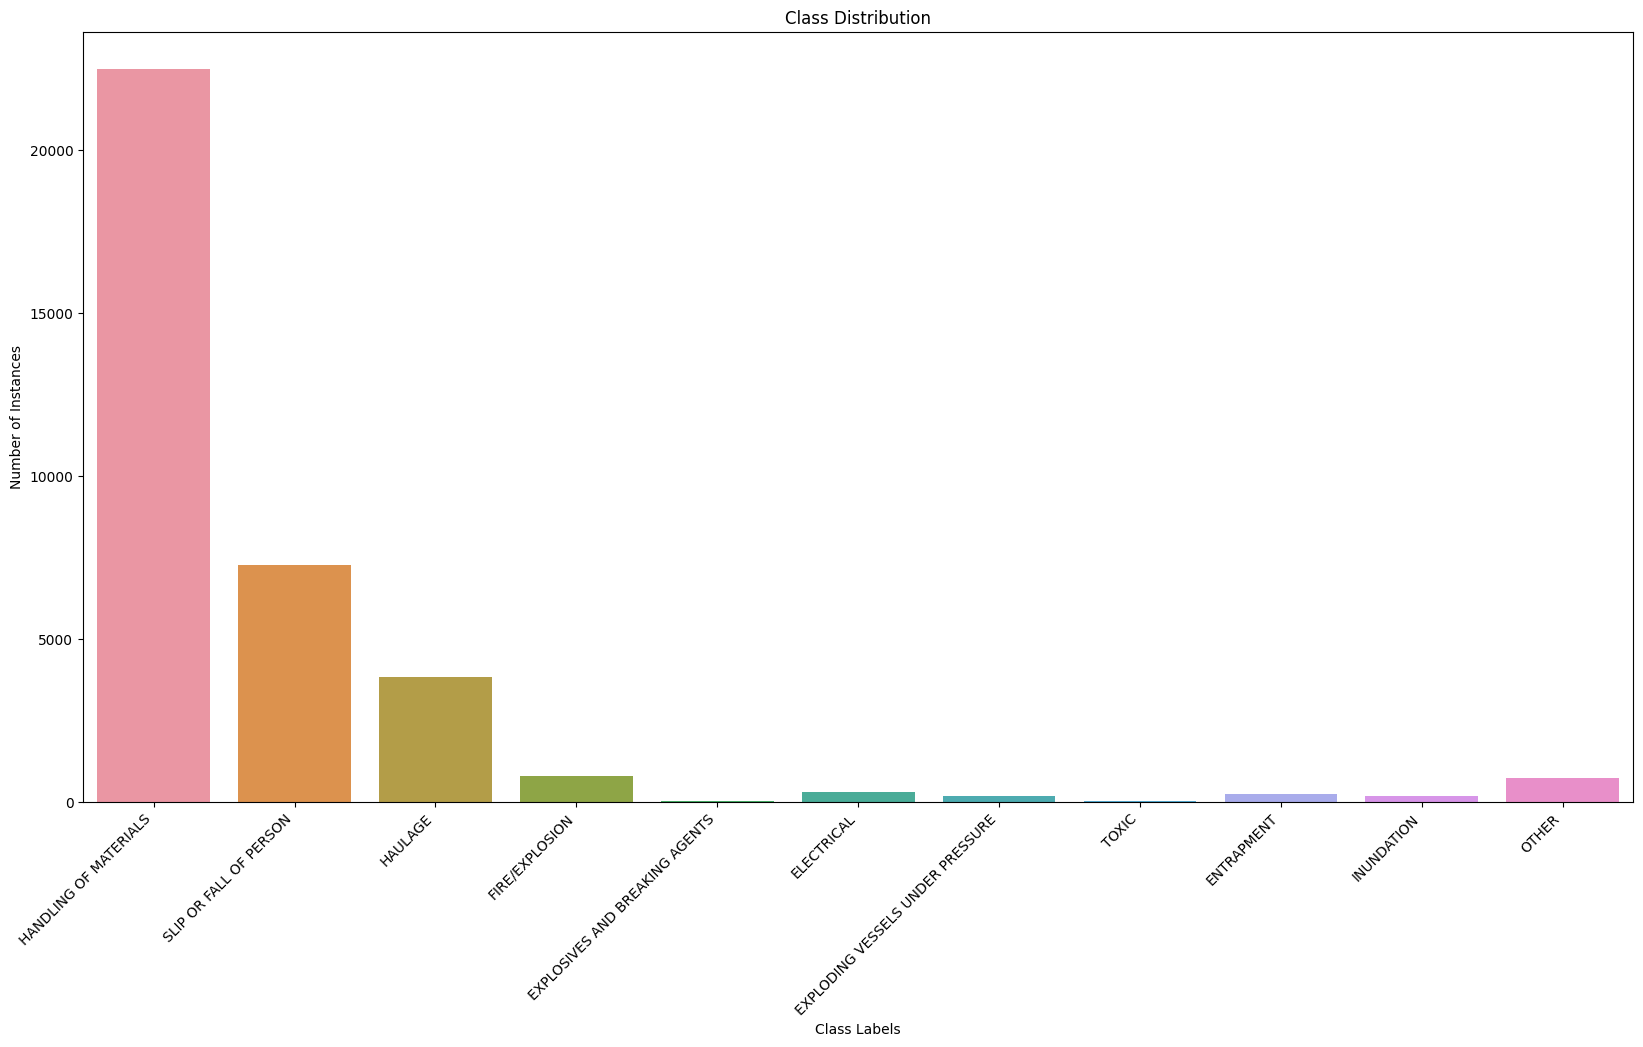

In [ ]:
# 3. Class Distribution Visualization
plt.figure(figsize=(20, 10))
ax = sns.countplot(x=raw_data["CLASSIFICATION"])
plt.xlabel('Class Labels')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

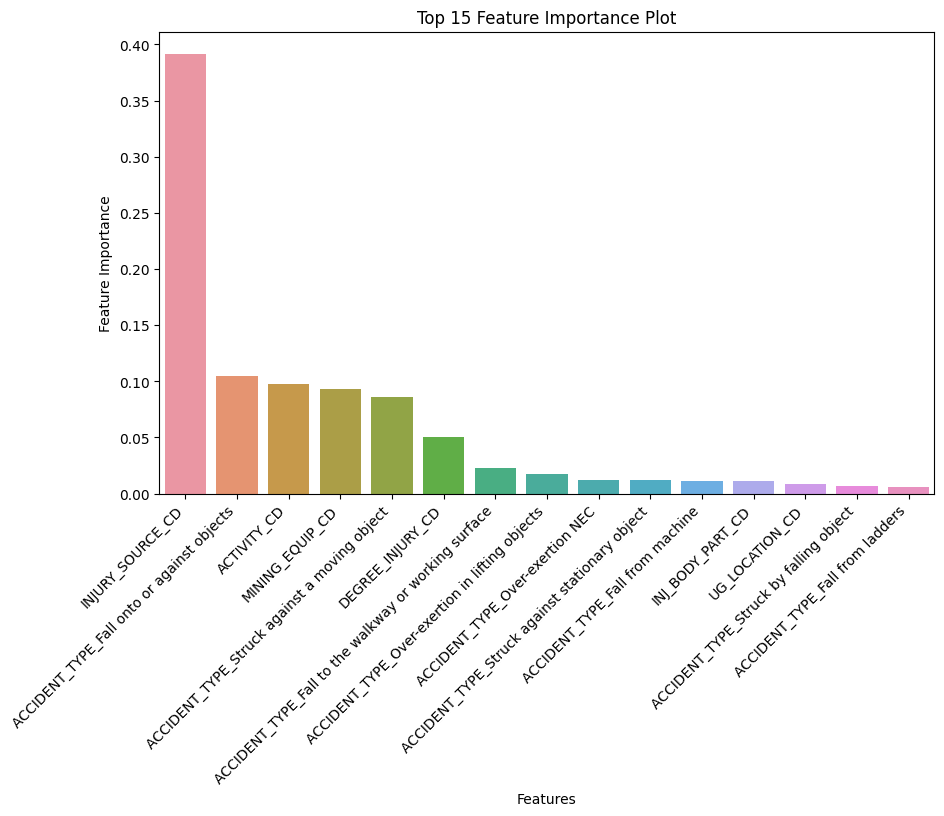

In [ ]:
# 4. Feature Importance Plot
top_n = 15

if hasattr(gbc_model, 'feature_importances_'):
    feature_importance = pd.Series(gbc_model.feature_importances_, index=X.columns)
    feature_importance = feature_importance.sort_values(ascending=False)[:top_n]  # Selecting top N features

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=feature_importance.index, y=feature_importance)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.ylabel('Feature Importance')
    plt.xlabel('Features')
    plt.title('Top {} Feature Importance Plot'.format(top_n))
    plt.show()

In [ ]:
# Find misclassified samples
misclassified_samples = y_test[y_test != y_pred]

# Sample some misclassified data for visualization (you can change the value of n_samples as needed)
n_samples = 10
sample_misclassified_data = misclassified_samples.sample(n_samples, random_state=42)

# Interactive Visualization using Plotly
fig = go.Figure()

for idx, value in sample_misclassified_data.iteritems():
    # Customize the visualization based on your data structure
    # For example, you can use a bar chart or any other chart types that suit your data
    # Here, we use a simple bar chart as an example
    fig.add_trace(go.Bar(x=[idx], y=[value], name=f'Sample {idx}'))

fig.update_layout(title='Misclassified Sample Visualization',
                  xaxis_title='Sample Index',
                  yaxis_title='Class Label')

# Show interactive plot
fig.show()

<ipython-input-57-a36ad1a262e5>:11: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



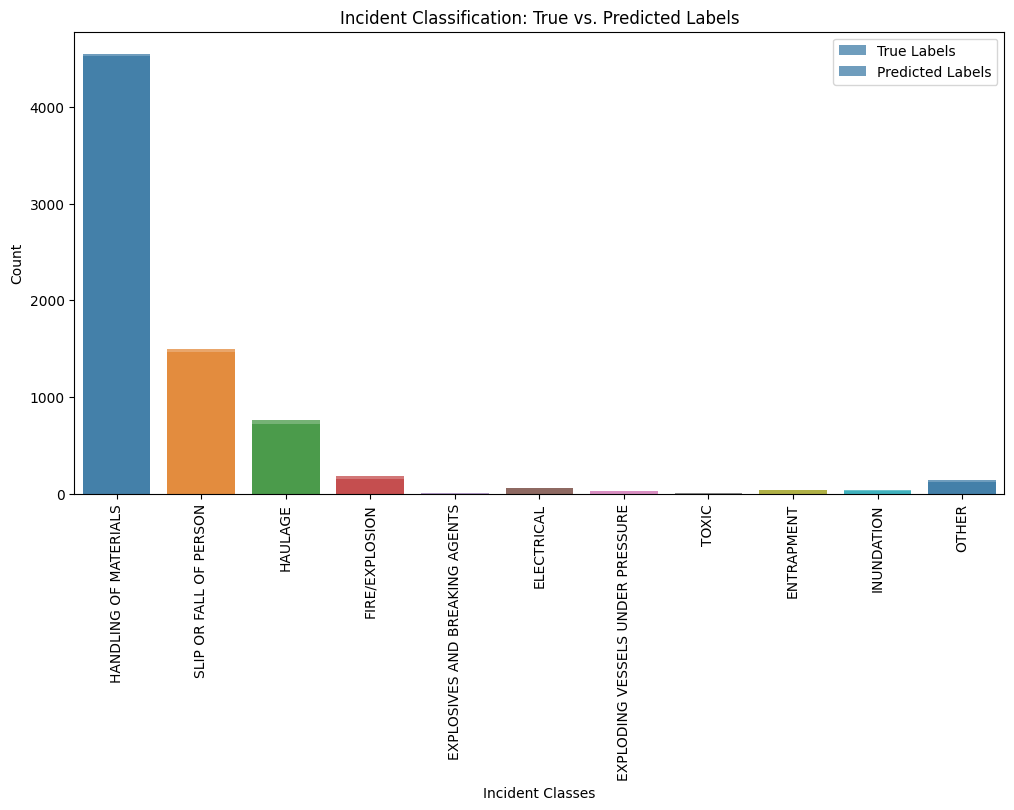

In [ ]:
# Create a DataFrame to store the true and predicted labels
df = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})

# Create a count plot to visualize the distribution of true and predicted labels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='True Labels', order=classes, palette='tab10', alpha=0.7, label='True Labels')
sns.countplot(data=df, x='Predicted Labels', order=classes, palette='tab10', alpha=0.7, label='Predicted Labels')
plt.xticks(rotation=90)
plt.xlabel('Incident Classes')
plt.ylabel('Count')
plt.title('Incident Classification: True vs. Predicted Labels')
plt.legend()
plt.show()

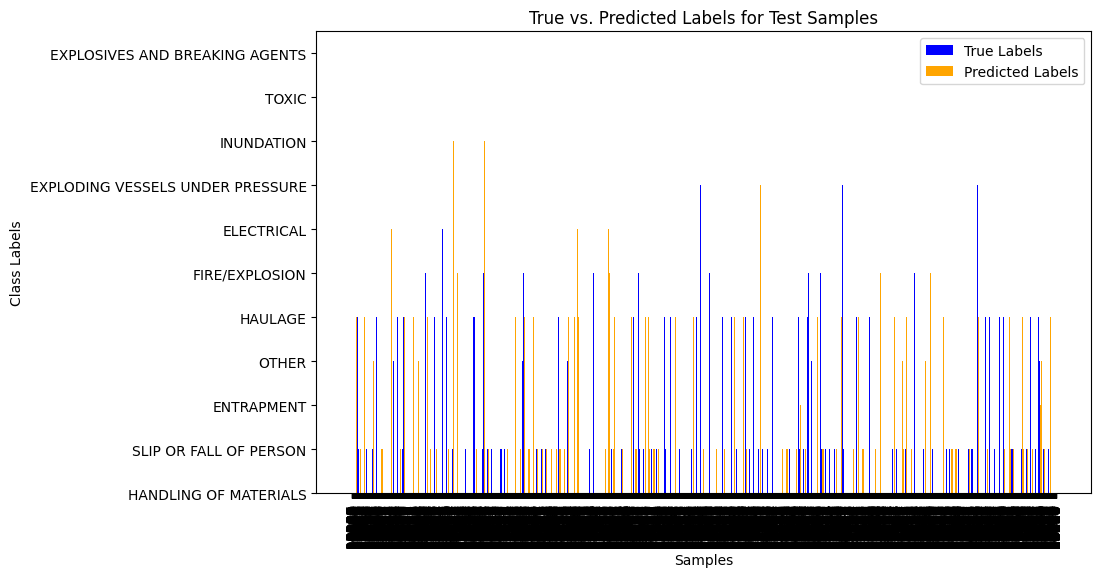

In [ ]:
# Create a figure to compare true labels and predicted labels
plt.figure(figsize=(10, 6))

# Set the x-axis for the plot
x_axis = np.arange(len(y_test))

# Plot true labels as blue bars
plt.bar(x_axis - 0.2, y_test, width=0.4, label='True Labels', color='blue')

# Plot predicted labels as orange bars
plt.bar(x_axis + 0.2, y_pred, width=0.4, label='Predicted Labels', color='orange')

# Add x-axis ticks and labels (assuming y_test and y_pred have the same length)
plt.xticks(x_axis, labels=y_test.index, rotation=90)  # Assuming y_test is a Pandas Series with index

plt.xlabel('Samples')
plt.ylabel('Class Labels')
plt.title('True vs. Predicted Labels for Test Samples')
plt.legend()
plt.show()

7204
11


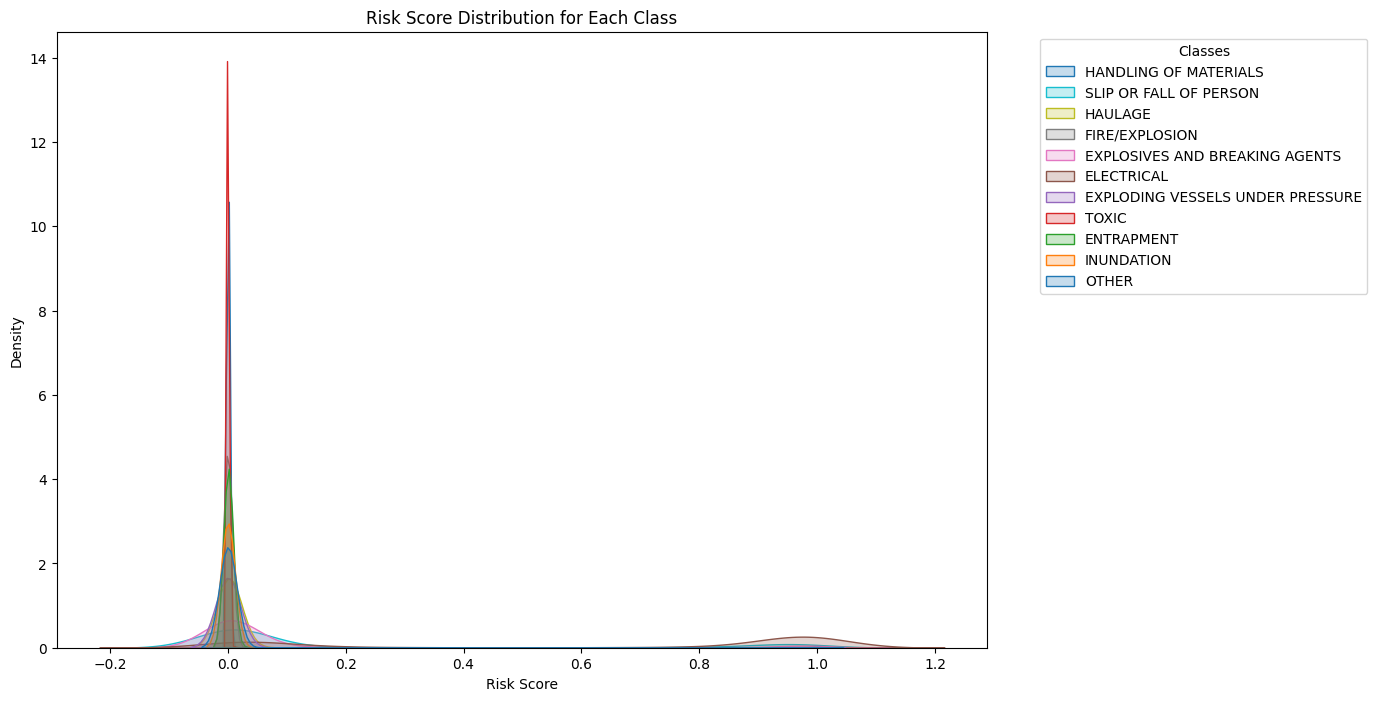

In [ ]:
y_prob = gbc_model.predict_proba(X_test)
n_samples = len(y_prob)
print(n_samples)
n_classes = len(classes)
print(n_classes)

# Create a DataFrame to store the predicted probabilities for each class
prob_df = pd.DataFrame(y_prob, columns=classes)

# Plot the risk score distribution for each class
plt.figure(figsize=(12, 8))
sns.kdeplot(data=prob_df, fill=True, palette='tab10')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.title('Risk Score Distribution for Each Class')
plt.legend(title='Classes', labels=classes, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# keys = label_encoder.classes_
# values = label_encoder.transform(label_encoder.classes_)
# output_map = dict(zip(keys, values))
# with open('classification_outputs.txt', 'w') as file:
#   for c, l in output_map.items():
#     file.write(f'{c},{l}\n')

In [ ]:
# data_for_plot = pd.concat([X, y])
# print(data_for_plot)

In [ ]:
# # Perform feature selection
# selector = SelectKBest(f_classif, k=len(X.columns))
# selected_features = selector.fit_transform(X_train, y_train)
# selected_features_test = selector.fit_transform(X_test, y_test)
# mask = selector.get_support()
# train_data_df = pd.DataFrame(data=selected_features, columns=X_train.columns[mask])
# # Get the names of the selected features

In [ ]:
# model = ExtraTreesClassifier(criterion ='entropy')
# model.fit(selected_features,y_train)
# feat_importances = pd.Series(model.feature_importances_, index = train_data_df.columns)

In [ ]:
# feat_importances.sort_values()

In [ ]:
# sorted_feat_imp_stats = feat_importances.sort_values(ascending=False)
# sorted_columns = sorted_feat_imp_stats.index

# x = np.array(sorted_feat_imp_stats.index)
# y = np.array(sorted_feat_imp_stats)

# fig = plt.figure(figsize = (15, 5))
# plt.bar(x, y, label = 'Feature Importance')
# plt.legend()
# plt.xticks(rotation = 90)
# plt.show()

In [ ]:
# features_to_be_considered = []
# features_to_remove = []
# for column in X.columns:
#   if feat_importances[column] >= 0.005:
#     features_to_be_considered.append(column)
#   else:
#     features_to_remove.append(column)

In [ ]:
# X = X.drop(features_to_remove, axis = 1)

In [ ]:
# Create a list of lists with column names in one list, feature importance sorted in the next list
# and the null values sorted according to the feature importance in another list
# Use the sorted lists to get the exact correlation graph

# from sklearn.preprocessing import minmax_scale

# sorted_null_stats = pd.Series()
# for column in sorted_columns:
#   sorted_null_stats[column] = raw_null_stats[column]

# x_axis = (np.arange(len(X.columns))) * 2
# scaled_null_stats = minmax_scale(sorted_null_stats, feature_range=(0, 0.5), axis=0, copy=True)
# scaled_feat_imp_stats = minmax_scale(sorted_feat_imp_stats, feature_range=(0, 0.5), axis=0, copy=True)
# scaled_threshold = (0.005 / max(sorted_feat_imp_stats)) * 0.5

# fig = plt.figure(figsize = (20, 5))
# plt.subplot(1,1,1)
# plt.bar(x_axis - 0.3, scaled_null_stats, width = 0.6, label = 'MissingValues')
# plt.bar(x_axis + 0.3, scaled_feat_imp_stats, width = 0.6, label = 'FeatureImportance')
# plt.plot([-1 * 2, (len(X.columns) * 2) + 1],[scaled_threshold, scaled_threshold], color = 'green', label = 'Importance Threshold')

# plt.xticks(x_axis, X.columns, rotation = 90)
# plt.grid()
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.preprocessing import minmax_scale

# sorted_null_stats = pd.Series()
# for column in sorted_columns:
#   sorted_null_stats[column] = X_null_stats[column]

# x_axis = (np.arange(len(X.columns))) * 2
# scaled_null_stats = minmax_scale(sorted_null_stats, feature_range=(0, 0.1), axis=0, copy=True)
# scaled_feat_imp_stats = minmax_scale(sorted_feat_imp_stats, feature_range=(0, 0.1), axis=0, copy=True)
# scaled_threshold = (0.005 / max(sorted_feat_imp_stats)) * 0.1

# fig = plt.figure(figsize = (20, 5))
# plt.subplot(1,1,1)
# plt.bar(x_axis - 0.3, scaled_null_stats, width = 0.6, label = 'MissingValues')
# plt.bar(x_axis + 0.3, scaled_feat_imp_stats, width = 0.6, label = 'FeatureImportance')
# plt.plot([-1 * 2, (len(X.columns) * 2) + 1],[scaled_threshold, scaled_threshold], color = 'green', label = 'Importance Threshold')

# plt.xticks(x_axis, X.columns, rotation = 90)
# plt.grid()
# plt.legend()
# plt.show()

In [ ]:
# colCD= []
# for col in X.columns:
#   if '_CD' in col:
#     colCD.append(col)

In [ ]:
# # Getting Unique Code to description dictionaries as json
# full_map_dict = {}
# for colCD in columnsCD:
#   colNoCD = colCD[:-3]
#   if colNoCD in excel_data.columns:
#     map_dict = dict(zip(excel_data[colCD],excel_data[colNoCD]))
#     full_map_dict[colNoCD] = map_dict
# with open("Code_description_mapping.json", "w") as outfile:
#     json.dump(full_map_dict, outfile)

In [ ]:
# with open("Code_description_mapping.json", "r") as outfile:
#     data = json.load(outfile)
# print(data)